In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

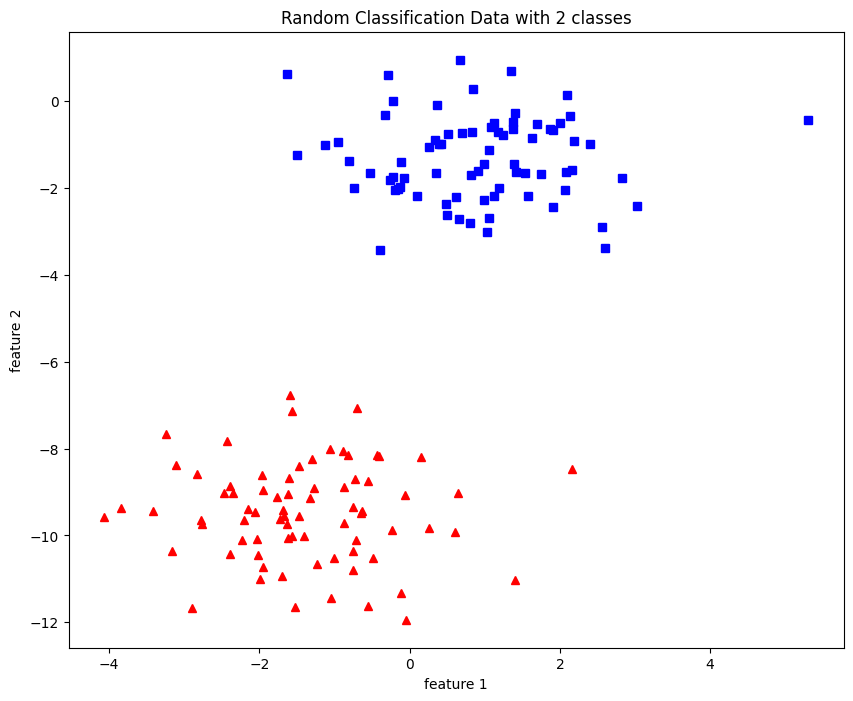

In [4]:
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

# Plotting
fig = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

# Display the plot
plt.show()

In [5]:
# la fonction d’activation de Heaviside
def acti_func(z):
  return 1 if z>0 else 0

In [6]:
def perceptron(X, y, lr, epochs):
  # X --> Inputs.
  # y --> labels/target.
  # lr --> learning rate.
  # epochs --> Number of iterations.
  # m-> number of training examples
  # n-> number of features
  m, n = X.shape
  # Initializing parameters(theta) to zeros.
  # +1 in n+1 for the bias term.
  w = np.zeros((n+1,1))
  # Empty list to store how many examples were
  # misclassified at every iteration.
  n_miss_list = []
  error_list=[]
  accuracy=[]
  # Training.
  for epoch in range(epochs):
    # variable to store #misclassified.
    n_miss = 0
    # looping for every example.
    for idx, x_i in enumerate(X):
      # Insering 1 for bias, X0 = 1.
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      # Calculating prediction/hypothesis.
      y_hat = acti_func(np.dot(x_i.T, w))
      # Updating if the example is misclassified.
      if (np.squeeze(y_hat) - y[idx]) != 0:
          w-=lr*(np.squeeze(y_hat) - y[idx])*x_i
      # Incrementing by 1.
          n_miss+=1
  # Appending number of misclassified examples
  # at every iteration.
    n_miss_list.append(n_miss)
    error_list.append(1-(m-n_miss)/m)
  return w, n_miss_list,error_list

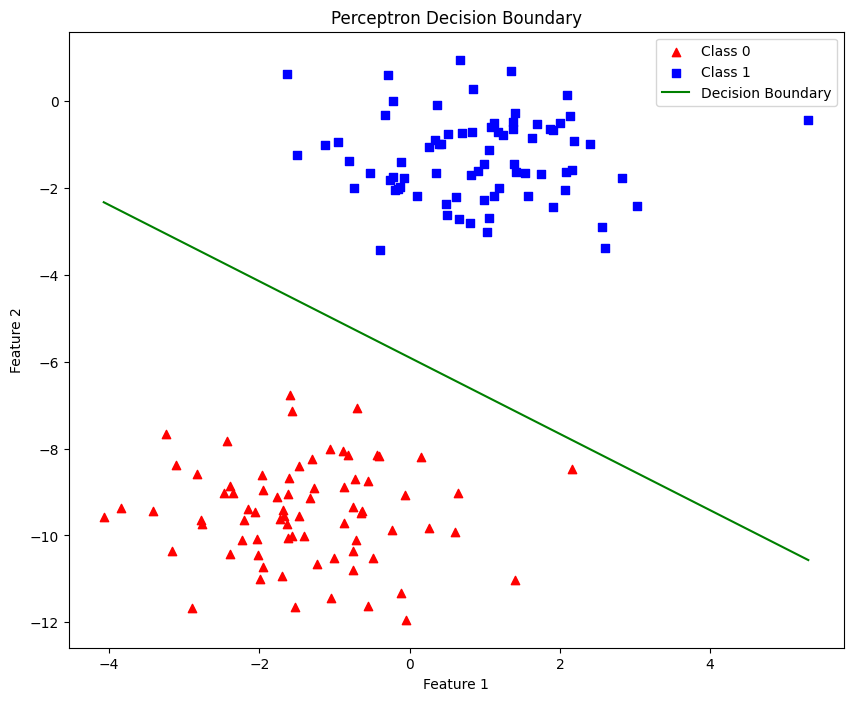

In [7]:
def plot_decision_boundary(X,y, w):
    # Assuming X has shape (m, 2) for two-dimensional features
    plt.figure(figsize=(10, 8))

    # Scatter plot for class 0 (assuming binary classification)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='^', label='Class 0')

    # Scatter plot for class 1
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='s', label='Class 1')

    m = -w[1] / w[2]
    c = -w[0] / w[2]

    x1 = [min(X[:, 0]), max(X[:, 0])]
    x2 = m * x1 + c
    plt.plot(x1, x2, color='green' , label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()

w, _,_ = perceptron(X, y, lr=0.01, epochs=3)
plot_decision_boundary(X,y, w)